# Clustering using MiniLM-L6

In [20]:
! pip install sentence-transformers -q
! pip install wordcloud -q

In [21]:
# import necesssary libraries

import pandas as pd

In [22]:
# Read dataset

english_dishes = pd.read_csv('english_dishes.csv')

In [23]:
english_dishes.head()

,name,count,language,language_code,language_confidence_score,no special characters,stemmed text,stop word removed text,corpus
0,""" hashed in cream",1,English,en,-21.231043,hashed in cream,"['hash', 'in', 'cream']","['hash', 'cream']",hash cream
1,""" Newburg",1,English,en,9.061840,Newburg,['newburg'],['newburg'],newburg
2,""" poached",1,English,en,9.061840,poached,['poach'],['poach'],poach
3,""" cocotte",1,English,en,9.061840,cocotte,['cocott'],['cocott'],cocott
4,""" "" mushrooms",1,English,en,9.061840,mushrooms,['mushroom'],['mushroom'],mushroom


In [44]:
english_dishes.fillna(' ', inplace=True)

## Embedding generation using MiniLM-L6

In [25]:
from sentence_transformers import SentenceTransformer

In [26]:
def generate_embeddings(sentences):
    model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

    # Encode the sentences
    embeddings = model.encode(sentences, show_progress_bar=True)

    return embeddings


In [45]:
english_dishes['corpus'] = english_dishes['corpus'].astype(str)

In [46]:
# Train test split

from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(english_dishes['corpus'], test_size=0.2, random_state=42)

In [59]:
# convert x_train, x_test to a list
x_train_list = x_train.tolist()
x_test_list = x_test.tolist()

In [60]:
X_train_embeddings = generate_embeddings(x_train_list)
X_test_embeddings = generate_embeddings(x_test_list)

Batches:   0%|          | 0/5768 [00:00<?, ?it/s]

Batches:   0%|          | 0/1442 [00:00<?, ?it/s]

In [ ]:
# this takes more time for execution
# english_dishes['embeddings'] = english_dishes['corpus'].apply(generate_embeddings)

In [61]:
# append embeddings to the dataframe

# english_dishes['embeddings'] = embeddings

## K Mean Clustering

C:\Users\sadak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sadak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sadak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

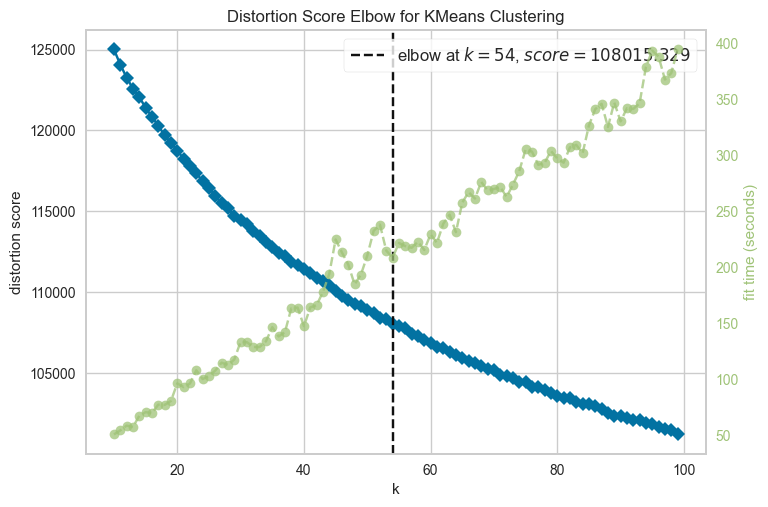

C:\Users\sadak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


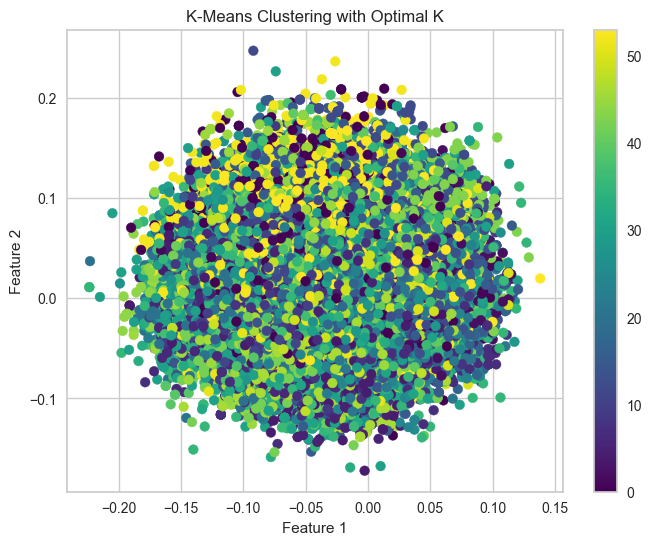

In [62]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Initialize the KMeans model
kmeans = KMeans(random_state=42, max_iter=100, init="k-means++")

# Initialize the KElbowVisualizer with the KMeans model
# The metric 'distortion' computes the sum of squared distances from each point to its assigned center
elbow_visualizer = KElbowVisualizer(kmeans, k=(10, 100), metric='distortion')

# Fit the visualizer to the data
elbow_visualizer.fit(X_train_embeddings)

# Show the elbow plot to find the optimal number of clusters
elbow_visualizer.show()

# Retrieve the optimal number of clusters from the elbow visualizer
optimal_clusters = elbow_visualizer.elbow_value_

# Re-run KMeans with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_train_embeddings)

# Assign the cluster labels to each point in the data
labels = kmeans_optimal.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_train_embeddings[:, 0], X_train_embeddings[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('K-Means Clustering with Optimal K')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()


In [63]:
optimal_clusters

54

In [64]:
x_train_cluster = kmeans_optimal.predict(X_train_embeddings)
x_test_cluster = kmeans_optimal.predict(X_test_embeddings)

In [65]:
x_train_cluster

array([ 1, 42, 13, ...,  7, 25, 48])

In [66]:
x_test_cluster

array([ 7, 31, 36, ..., 14, 30,  4])

In [67]:
data = {'Dish': x_train,
        'Cluster' : x_train_cluster
    }
x_train_df = pd.DataFrame(data)

In [69]:
x_train_df.head()

,Dish,Cluster
95706,fri soft shell crab bacon sauc remoulad,1
186568,scotch whiskey usher v g,42
229044,roast rib beef au ju small green garden pea ba...,13
125108,lamb chop bread tomato sauc,3
10099,b b,30


data.head()

In [70]:
x_train_df.to_csv('miniLLM clusters', index=False)

In [71]:
x_train_df[x_train_df['Cluster']==1]

,Dish,Cluster
95706,fri soft shell crab bacon sauc remoulad,1
90398,fresh boston schrod crabmeat stuf,1
91425,fresh mushroom stuf oyster crab,1
17307,bean curd w crab meat,1
190343,shrimp pequin,1
...,...,...
179997,smoke steam shrimp veg,1
106530,gulf shrimp ice tradit sauc celeri root fennel...,1
67435,crab leg cocktail,1
190222,shrimp meat shoumai piec,1


## Word Cloud of cluster 1

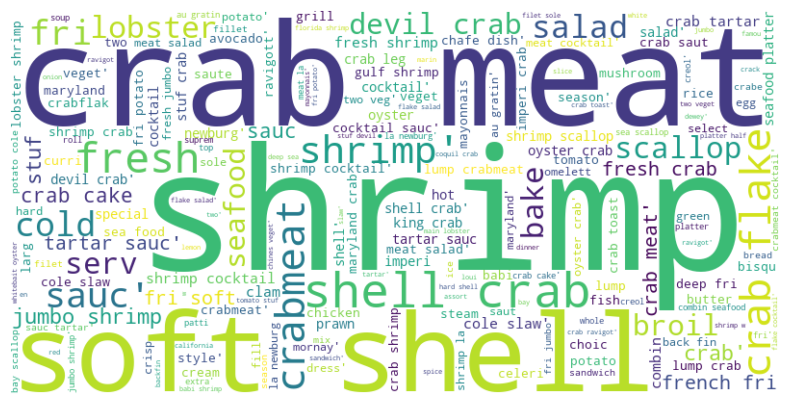

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = ' '.join(map(str, x_train_df[x_train_df['Cluster']==1].values))

#'text_data' contains your text data
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Word Cloud of Cluster 2

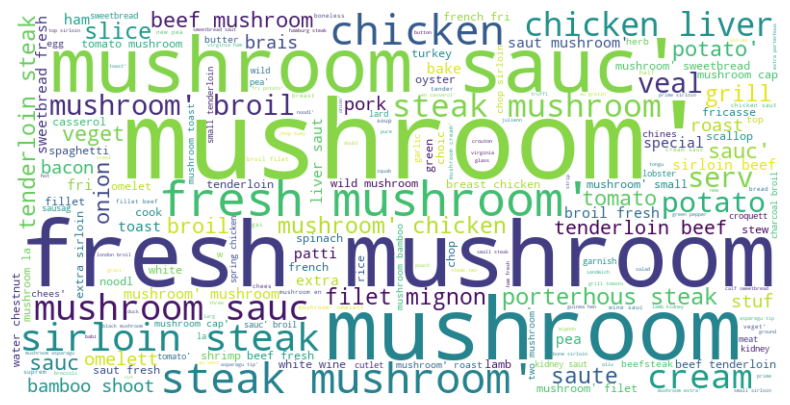

In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = ' '.join(map(str, x_train_df[x_train_df['Cluster']==2].values))

#'text_data' contains your text data
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Word Cloud of Cluster 3

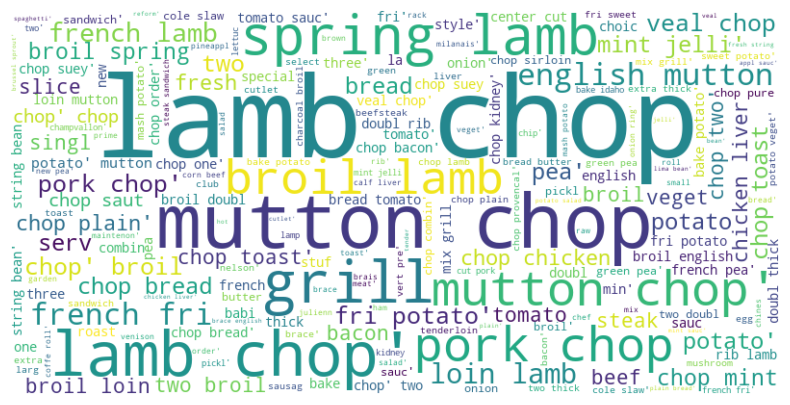

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = ' '.join(map(str, x_train_df[x_train_df['Cluster']==3].values))

#'text_data' contains your text data
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Conclusion

K-means clustering with Mini LM L6 embeddings results in more cohesive and interpretable menu items compared to TF-IDF embeddings.

further we can try openAI embeddings and form clusters